# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [176]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [177]:
# renaming columns to make it more sense
df.rename({
    'GRADES_PK_G':'NUM_PK',
    'GRADES_KG_G':'NUM_KG',
    'GRADES_4_G':'NUM_4',
    'GRADES_8_G':'NUM_8',
    'GRADES_12_G':'NUM_12',
    'GRADES_1_8_G':'NUM_PRIMARY', 
    'GRADES_9_12_G':'NUM_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_USC'
    },
    axis=1,inplace=True)

In [178]:
# print out number of missing values in each col
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_USC                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
NUM_PK                           173
NUM_KG                            83
NUM_4                             83
NUM_8                             83
NUM_12                            83
NUM_PRIMARY                      695
NUM_HS                           644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [179]:
#print out the number of non-missing values
df.notna().sum()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_USC                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
NUM_PK                          1542
NUM_KG                          1632
NUM_4                           1632
NUM_8                           1632
NUM_12                          1632
NUM_PRIMARY                     1020
NUM_HS                          1071
ENROLL_ALL                      1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [180]:
# I want to eventually turn my focus on grade 8 math, so I will take care of any missing values in that column
# I will first check to see if there are crazy outliers. If not many, I will fill in the missing values with the median
# If the above comment doesn't apply, then I'll just drop all of the rows with missing values.
df["AVG_MATH_8_SCORE"].describe()

count    602.000000
mean     278.280731
std       10.343482
min      231.000000
25%      272.000000
50%      280.500000
75%      286.000000
max      301.000000
Name: AVG_MATH_8_SCORE, dtype: float64

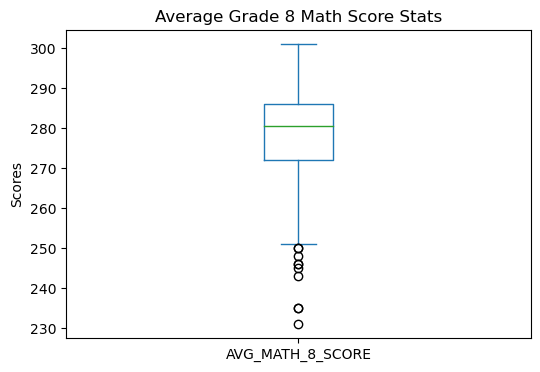

In [181]:
#Here I'm making a box plot to get a a visualization of the column stats so I can better decide how I'm going to deal with the missing values
mpl.figure(figsize=(6,4))
df["AVG_MATH_8_SCORE"].plot(kind="box")

#label the plot
mpl.title("Average Grade 8 Math Score Stats")
mpl.ylabel("Scores")

mpl.show()

Matplotlib ignores missing values, and there appears to only be 7 outliers in a pool of 602 valid entries. 
Also if I only use the non-empty values, I'd be considering 602/1113 data points. A lot of those rows that are missing 8th grade math data  might provide valuable insights in regards to the other columns.

But by populating all of the missing data with the median I would be tampering with the data set, and skew up the distributions, so I will just drop all missing values

I began my eda without cleaning up the other columns, and I noticed that it caused some weird patterns on my scatter plots (straight lines shooting across the graphs). So I'm going back to clean up the other columns

For my EDA, I'm planning on exploring the correlation between Grade 8 math scores and expenditure as well as revenue, so I will clean up those columns

In [201]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_USC,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,NUM_8,NUM_12,NUM_PRIMARY,NUM_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,LOCAL_EXPENDITURE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,3.852618
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,5.700798
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,2.777389
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,3.891361
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,4.609008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,6.821412
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,5.987842
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,6.559344
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,6.595384


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [202]:
df["YEAR"].nunique()

33

In [203]:
# Here I had to figure out how to filter values for the purpose of the next prompt
df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()


276.1666666666667

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [204]:
# once I got that, I can write a simple if system that prints out the right thing
if(df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean() > df[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()
):
    print("michigan")
else:
    print("ohio")

ohio


Find the average for your chosen test across all states in 2019

In [205]:
#check what dtype year is
df["YEAR"].dtype

dtype('int64')

In [206]:
df[df["YEAR"]== 2019]["AVG_MATH_8_SCORE"].mean()

281.2641509433962

For each state, find a maximum value for your chosen test score

In [207]:
states_df = df.groupby("STATE")
states_df["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

Below is me making some observations by isolating variables and seeing if there are any correlations with the math score

In [208]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_USC', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'NUM_PK', 'NUM_KG', 'NUM_4', 'NUM_8',
       'NUM_12', 'NUM_PRIMARY', 'NUM_HS', 'ENROLL_ALL', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'LOCAL_EXPENDITURE_PER_STUDENT'],
      dtype='object')

Text(0, 0.5, '8th Grade Math Score')

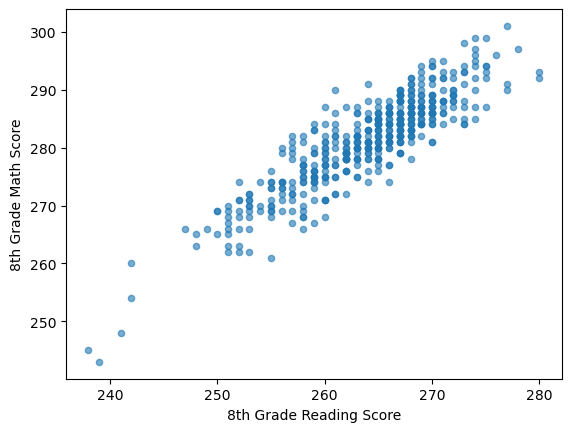

In [209]:
# Correlation between avg 8th grade math and avg 8th grade reading scores??
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
mpl.xlabel('8th Grade Reading Score')
mpl.ylabel('8th Grade Math Score')

Okay, there seems to be a strong correlation, though I think there may be some missing values in the reading score as well

Text(0, 0.5, '8th Grade Math Score')

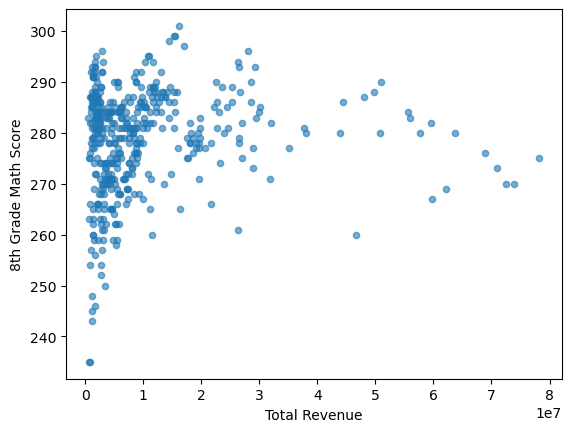

In [210]:
# Correlation between avg 8th grade math and total revenue??
df.plot.scatter(x='TOTAL_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.6)
mpl.xlabel('Total Revenue')
mpl.ylabel('8th Grade Math Score')

I'm just now realizing that I should go back and clean up the rest of the columns. I will proceed to populate all missing values with the column median.

Text(0, 0.5, '8th Grade Math Score')

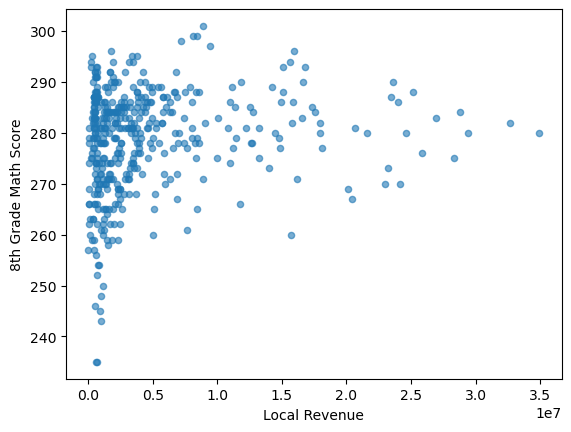

In [211]:
# Correlation between avg 8th grade math and different revenue types??
df.plot.scatter(x='LOCAL_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.6)
mpl.xlabel('Local Revenue')
mpl.ylabel('8th Grade Math Score')

There doesn't seem to be any good correlation between any of the revenue types

Text(0, 0.5, '8th Grade Math Score')

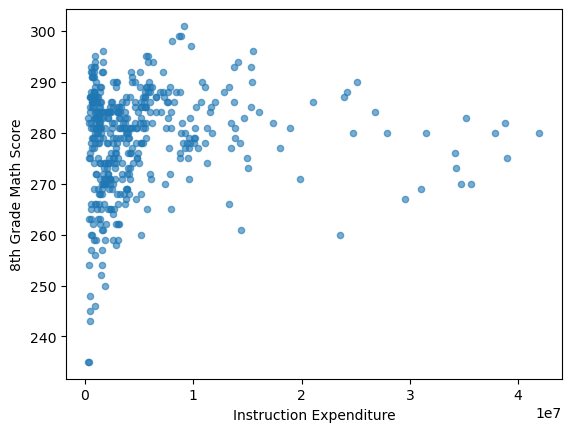

In [212]:
# Correlation between avg 8th grade math and the different expidentures??
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.6)
mpl.xlabel('Instruction Expenditure')
mpl.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

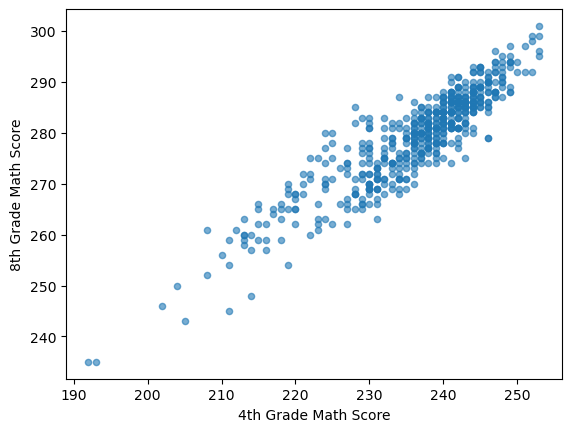

In [213]:
# Correlation between avg 8th grade math and avg 4th grade math??
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
mpl.xlabel('4th Grade Math Score')
mpl.ylabel('8th Grade Math Score')

Bingo

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [214]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_USC', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'NUM_PK', 'NUM_KG', 'NUM_4', 'NUM_8',
       'NUM_12', 'NUM_PRIMARY', 'NUM_HS', 'ENROLL_ALL', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'LOCAL_EXPENDITURE_PER_STUDENT'],
      dtype='object')

In [215]:
# I'm going to make a new column that correlates the average 4th grade math score with local expenditure
df['LOCAL_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: If local spending is increased, then localized care for students increase, thus increasing the 4th grade math scores, in turn increasing the 8th grade scores.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '8th Grade Reading Score Over Time')

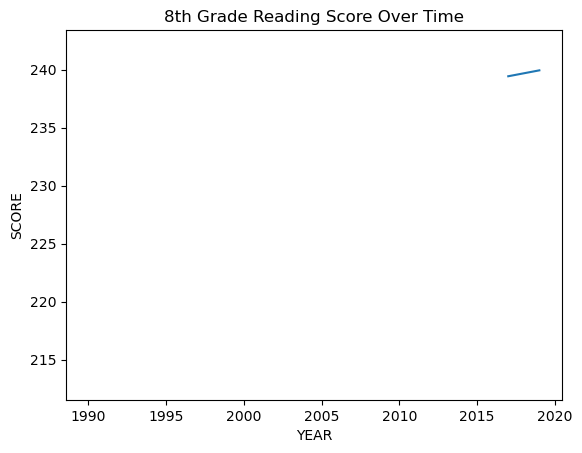

In [216]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
mpl.ylabel('SCORE')
mpl.title('8th Grade Reading Score Over Time')

**As seen there is no strong correlation between year and score**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

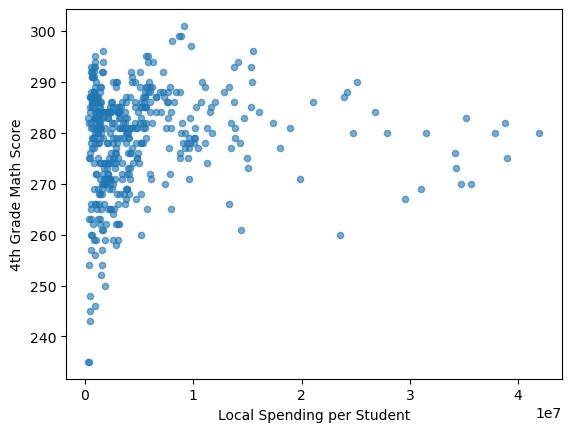

In [217]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.6)
mpl.xlabel('Local Spending per Student')
mpl.ylabel('4th Grade Math Score')

**As seen there is no strong correlation**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [218]:
from sklearn.model_selection import train_test_split

In [224]:
X = df[['AVG_MATH_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']
y.fillna(y.median(), inplace=True)

In [225]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [226]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [227]:
# create your model here
model = LinearRegression()

In [228]:
model.fit(X_train, y_train)

LinearRegression()

In [229]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [230]:
# root mean squared error -- penalizes large errors
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

# R^2 value describes how well a linear model fits the data
print(model.score(X_test, y_test))

4.3451434562937115
0.5440115770048425


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

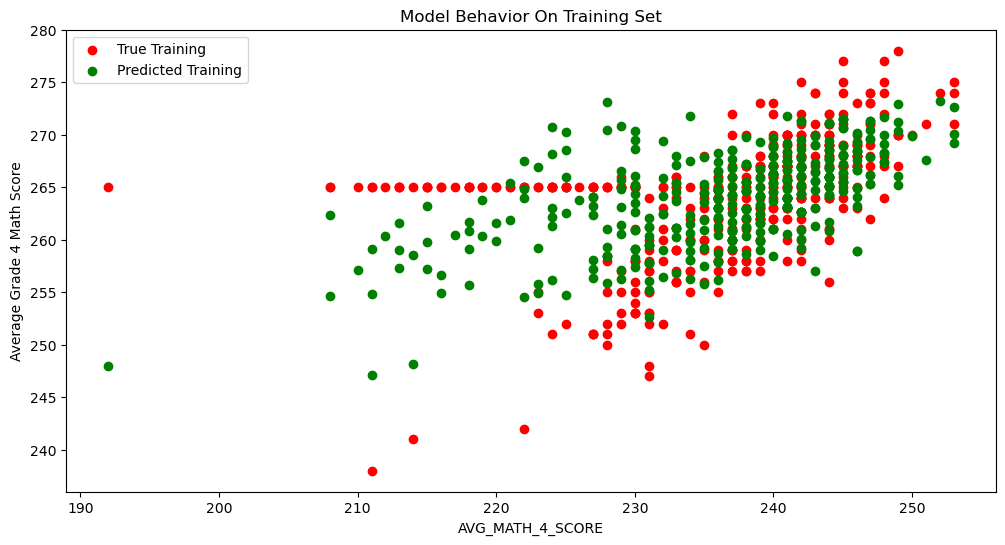

In [233]:
col_name = 'AVG_MATH_4_SCORE'

f = mpl.figure(figsize=(12,6))
mpl.scatter(X_train[col_name], y_train, color = "red")
mpl.scatter(X_train[col_name], model.predict(X_train), color = "green")

mpl.legend(['True Training','Predicted Training'])
mpl.xlabel(col_name)
mpl.ylabel('Average Grade 4 Math Score')
mpl.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

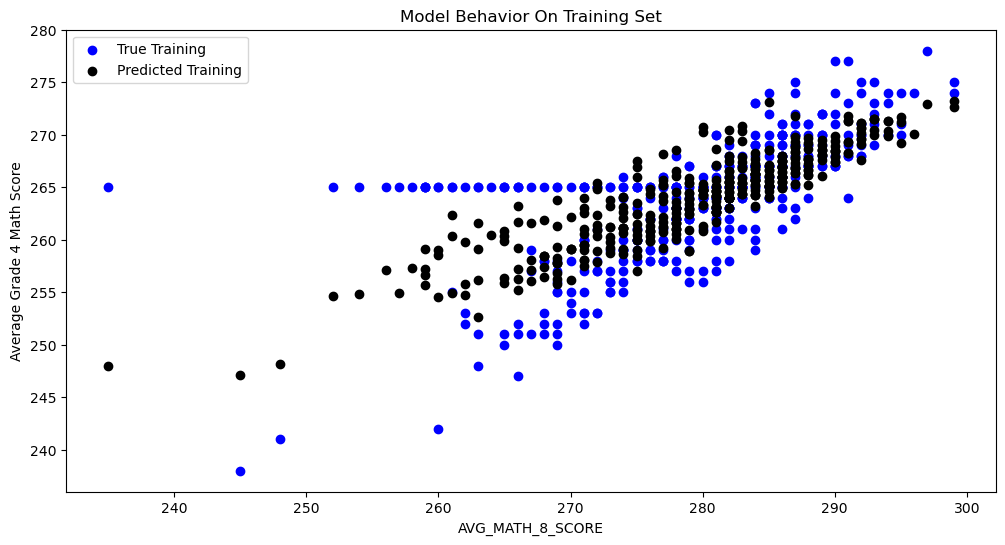

In [246]:
col_name = 'AVG_MATH_8_SCORE'

f = mpl.figure(figsize=(12,6))
mpl.scatter(X_train[col_name], y_train, color = "blue")
mpl.scatter(X_train[col_name], model.predict(X_train), color = "black")

mpl.legend(['True Training','Predicted Training'])
mpl.xlabel(col_name)
mpl.ylabel('Average Grade 8 Math Score')
mpl.title("Model Behavior On Training Set")